1.Why is it generally preferable to use a Logistic Regression classifier rather than a classical
Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training
algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression
classifier?

A classical perceptron will only converge if the data is linearly seperable. It also cannot compute class probabilities. The logistic regression classifier is able to converge on non-linear data and outputs class probabilities.

If we want to tweak the Perceptron to make it like a logistic regression classifier we can do so by changing the activation function to the softmax or the sigmoid function and train it using gradient descent, or some other optimization algorithm.

2.Why was the logistic activation function a key ingredient in training the first MLPs?

The logistic activation function is smooth at all points. So, its derivative is always non-zero. This allows gradient descent to find smaller values of theta after each iteration. When the activation function is a step function, gradient descent cannot move at all because there is no slope.

3.Name three popular activation functions. Can you draw them?

Three popular activation functions are ReLU , Sigmoid, TanH.

In [21]:
# ReLu Activation function

def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

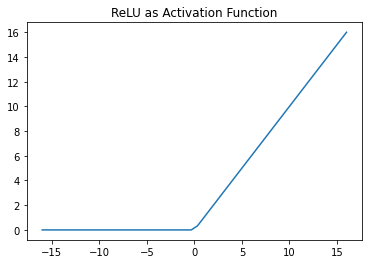

In [25]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-16, 16)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('ReLU as Activation Function')
plt.show()

In [26]:
# Sigmoid activation function

def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''

    return 1/(1+np.exp(-x))

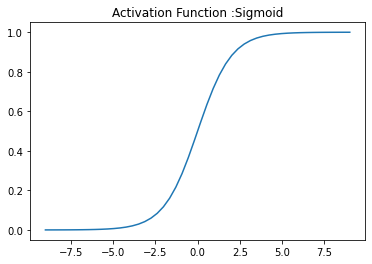

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-9, 9)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function :Sigmoid')
plt.show()

In [28]:
# TanH activation function

def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.'''

    return np.tanh(x)

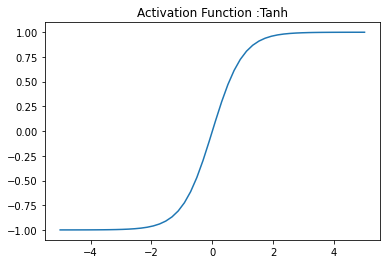

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function :Tanh')
plt.show()

4.Suppose you have an MLP composed of one input layer with 10 passthrough neurons,
followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3
artificial neurons. All artificial neurons use the ReLU activation function.
 What is the shape of the input matrix X?
 What about the shape of the hidden layer’s weight vector Wh, and the shape of its
bias vector bh?
 What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
 What is the shape of the network’s output matrix Y?
 Write the equation that computes the network’s output matrix Y as a function
of X, Wh, bh, Wo and bo.

What is the shape of the input matrix X?
The shape of X will be (m x 10) where m is the batch size. The logic of a passthrough neuron is that it should have no effect at all on the input layer. Therefore, there must be one neuron for each input feature that allows the input feature to pass through to the next layer without altering its value in any way.

What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?
Since the hidden layer has 50 neurons and there are 10 features, its weight vector will have the shape of 10 x 50. Because each of the 10 features will need to be multiplied by a weight which is connected to each of the 50 hidden layer neurons.

The bias vector will have a length of 50. This is because one bias unit is added to the output of the passthrough layer. That unit is then multiplied once for each of the 50 artificial neurons.

What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
The output layer has 3 neurons. The input to the output layer is the output of the hidden layer.The output of the hidden layer has 50 neurons, therefore the shape of the output layer's weight vector is 50 x 3.

The bias vector will have a length of 3 because one bias unit is added to the output of the hidden layer. That unit is then multiplied once for each of the 3 neurons in the output layer.

What is the shape of the network’s output matrix Y?
The shape of the output matrix is going to be m x 3, where m is the batch size, and 3 because each example will compute a probability that it belongs to one of three classes.

Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.
Y = (X * Wh + bh) * (Wo + bo)

When adding a bias vector to a matrix it is added to every single row. This is called broadcasting.

5.How many neurons do you need in the output layer if you want to classify email into spam
or ham? What activation function should you use in the output layer? If instead you want to
tackle MNIST, how many neurons do you need in the output layer, using what activation
function?

Email classification is a binary classification problem, so we would only need one neuron in the output layer. This neuron would indicate the probability that the email is spam or ham. We would most likely use the sigmoid activation function in the output layer.

For the MNIST problem we would need 10 output neurons in the final layer, one for each digit. We would then replace the logistic function with the softmax function which can output one probability per class per digit.

6.What is backpropagation and how does it work? What is the difference between
backpropagation and reverse-mode autodiff?

Backpropagation is an algorithm used to train neural networks. It first computes the gradients of the cost function with regards to every model parameter then it performs a gradient descent step using these gradients.

This backpropagation step is performed until the model parameters converge to values that hopefully minimize the cost function.

Backpropagation refers to the whole process of training a neural network. Reverse-mode autodiff is a technique to compute the gradients efficiently. It is used by the backprop algorithm.

7.Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the
training data, how could you tweak these hyperparameters to try to solve the problem?

Generally, the hyperparameters of a neural network we can adjust are the number of hidden layers, the number of neurons in each hidden layer, and the activation function used by each neuron.

For binary classification, we use the logistic activation function. For a multi-class problem, we use softmax. For a linear regression problem, we don't use an activation function.

Some simple ways to try and solve overfitting are reducing the number of hidden layers or the number of neurons.

8.Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try
adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of
an interruption, add summaries, plot learning curves using TensorBoard, and so on).

In [8]:
import tensorflow as tf
import numpy as np
n_inputs = 28*28
n_hidden1 = 150
n_hidden2 = 150
n_hidden3 = 150 
n_outputs = 10

# Defining input data placeholders and layers

First of all, let's create the deep net. Add a tf.summary.scalar() to track the loss and the accuracy during training so we can view nice learning curves using TensorBoard.

tf.reset_default_graph()
#creating input data placeholders
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

#creting hidden and output layers
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", 
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

# Define loss function and gradient descent

with tf.name_scope("loss"):
    #calculate cross entropy cost function with softmax for each 
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, 
                                                              logits=logits)
    #take mean crossentropy across all observations
    loss = tf.reduce_mean(xentropy, 
                          name="loss")
    #record mean cross entropy (loss)
    loss_summary = tf.summary.scalar('log_loss', 
                                     loss)
    
learning_rate=0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

# Assessment of model accurarcy

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    #record accuracy
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [16]:
# Create function to create time specific log_dirs

from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

log_dir('TEST')

'tf_logs/TEST-run-20220506162812/'

#create FileWriter that we use to write TensorBoard logs
logdir = log_dir("MCs_MNIST_DNN")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# Run the model
For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's input_data() function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define X_valid and y_valid:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

X_valid = mnist.validation.images
y_valid = mnist.validation.labels

print(X_train.shape)
m, n = X_train.shape

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
(55000, 784)

import os
#initialize initializer and saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

os.remove(checkpoint_epoch_path)

with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Validation accuracy: 89.940% 	Loss: 0.38489
Epoch: 5 	Validation accuracy: 94.600% 	Loss: 0.19169
Epoch: 10 	Validation accuracy: 96.240% 	Loss: 0.14079
Epoch: 15 	Validation accuracy: 96.780% 	Loss: 0.11758
Epoch: 20 	Validation accuracy: 97.160% 	Loss: 0.10222
Epoch: 25 	Validation accuracy: 97.460% 	Loss: 0.08975
Epoch: 30 	Validation accuracy: 97.420% 	Loss: 0.08348
Epoch: 35 	Validation accuracy: 97.800% 	Loss: 0.07867
Epoch: 40 	Validation accuracy: 97.700% 	Loss: 0.07624
Epoch: 45 	Validation accuracy: 97.800% 	Loss: 0.07461
Epoch: 50 	Validation accuracy: 98.040% 	Loss: 0.07239
Epoch: 55 	Validation accuracy: 98.040% 	Loss: 0.07349
Epoch: 60 	Validation accuracy: 97.940% 	Loss: 0.07243
Epoch: 65 	Validation accuracy: 98.100% 	Loss: 0.07067
Epoch: 70 	Validation accuracy: 98.080% 	Loss: 0.07124
Epoch: 75 	Validation accuracy: 98.160% 	Loss: 0.07158
Epoch: 80 	Validation accuracy: 98.180% 	Loss: 0.07208
Epoch: 85 	Validation accuracy: 97.960% 	Loss: 0.07318
Epoch: 90 	Validation accuracy: 98.080% 	Loss: 0.07304
Epoch: 95 	Validation accuracy: 98.240% 	Loss: 0.07492
Epoch: 100 	Validation accuracy: 98.120% 	Loss: 0.07413
Epoch: 105 	Validation accuracy: 98.220% 	Loss: 0.07523
Epoch: 110 	Validation accuracy: 98.180% 	Loss: 0.07619
Early stopping
INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model

accuracy_val

0.97750002

So accuracy is 97.75% . If we round it off then the accuracy will be 98%.